In [ ]:
import os
# Check if you're on Google drive or on your own machine.
# Get path to your data.
if ('google' in str(get_ipython())):
    from google.colab import drive
    drive.mount('ME', force_remount=True)
    predir='ME/MyDrive/thesis_final'

Mounted at ME


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from tqdm import tqdm
import pickle

from sklearn.preprocessing import StandardScaler
import sympy
import torch
import torch.nn as nn


import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import io
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

# notebook variables

In [ ]:
groups = {
    'cat': ['nala_cat','realgrumpycat','smoothiethecat','catconworldwide','maple.cat','catinberlin','catladybox','triumphant_teagan','aliencatmatilda','mollymollzthetabby','my_lulu_cat_','my_furry_babies','monicasisson','allcreaturestv','moana.and.snapple','thatcatconrad','catsvscancer','baili_the_cat','panther.cat','rajathebengal','butter_the_siberian','trippy.tails','bearbear.cat','mochicat168','bellina_kitty_cat','rainerogers','ambrosepets','realbadgalrhirhi','pawaiihub','denbo_nish','siberian.milo'],
    'cook': ['halfbakedharvest','ketosnackz','nourishing','smittenkitchen','olivia.adriance','chloecleroux','geoffreyzakarian','177milkstreet','winnyhayes','alyssacoadynutrition','liveeatlearn','thefoodnanny','femalefoodie','sherryhour','allinspiredwellness','mytoddlerskitchen','simplicityandastarter','reciperunner','jamleenbears','lydialove98','mleroehler','anniesfinds_','carnivore_connoisseur_','littlespoonfarmblog','perfectsupplements','feelgoodwithfi','yourstrulyani','thismomentinthyme','leahmariestack','through.manals.lens','recipesfrommichelle','mccauley_tawpash','mintandclove','ashleighbovard','neeleman_food_'],
    'brands' : ['nike', 'adidas', 'starbucks', 'apple', 'samsung', 'netflix', 'amazon', 'google', 'microsoft', 'tesla', 'cocacola', 'pepsi', 'redbull', 'louisvuitton', 'gucci', 'chanel', 'prada', 'zara', 'hugo', 'hm', 'ikea', 'lego', 'target', 'walmart', 'mcdonalds', 'burgerking', 'kfc', 'dominos', 'airbnb', 'uber', 'spotify', 'youtube', 'facebook', 'instagram', 'twitter', 'pinterest', 'tiktok', 'snapchat', 'linkedin', 'sony', 'playstation', 'xbox', 'nintendo', 'disney', 'marvel', 'pixar', 'warnerbros', 'hbo', 'hulu', 'espn', 'nba', 'nfl', 'fifa', 'nikefootball', 'adidasfootball', 'puma', 'underarmour', 'reebok', 'converse', 'vans', 'forever21', 'victoriassecret', 'calvinklein', 'tommyhilfiger', 'ralphlauren', 'burberry', 'dior', 'versace', 'balenciaga', 'givenchy', 'fendi', 'hermes', 'cartier', 'tiffanyandco', 'rayban', 'oakley', 'gopro', 'canon', 'nikon', 'sonymusic', 'universalmusic', 'warnerrecords', 'atlanticrecords', 'rollingstone', 'vogue', 'elle', 'harpersbazaar', 'cosmopolitan'],
    'celebrities' : ['cristiano', 'leomessi', 'selenagomez', 'therock', 'kyliejenner', 'arianagrande', 'kimkardashian', 'beyonce', 'khloekardashian', 'justinbieber', 'kendalljenner', 'taylorswift', 'jlo', 'nickiminaj', 'kourtneykardash', 'mileycyrus', 'katyperry', 'zendaya', 'kevinhart4real', 'kingjames', 'ddlovato', 'badgalriri', 'champagnepapi', 'ellendegeneres', 'k.mbappe', 'billieeilish', 'lalalalisa_m', 'vindiesel', 'shraddhakapoor', 'priyankachopra', 'narendramodi', 'shakira', 'snoopdogg', 'davidbeckham', 'dualipa', 'jennierubyjane', 'aliaabhatt'],
    'democrats' : ['joebiden', 'kamalaharris', 'barackobama', 'michelleobama', 'berniesanders', 'aoc', 'chuckSchumer', 'elizabethwarren', 'amyklobuchar', 'corybooker', 'chrismurphyct', 'repjerrynadler', 'repkatieporter', 'repvaldemings', 'repdebhaaland', 'repmarkpocan', 'repjimmygomez', 'repdavidcicilline', 'repdonbeyer', 'repderekkilmer', 'repsusielee', 'repkathleenrice', 'repjimhimes', 'repgregstanton', 'repjuanvargas', 'repmikethompson', 'repjimlangevin', 'repjimcosta', 'repjimmygomez', 'repjoshharder', 'repkatiehill'],
    'republicans' : ['mikepence', 'realdonaldtrump', 'potus', 'lindseygrahamsc', 'tedcruz', 'mittromney', 'pauldavisryan', 'ronjohnsonwi', 'marcorubio', 'newtgingrich', 'speakermccarthy', 'johncornyn', 'rondesantis', 'kristinoem', 'stevescalise', 'markmeadows', 'tx', 'elisestefanik', 'leezeldin', 'cathymcmorris', 'replizcheney', 'repmattgaetz', 'repbrianmast', 'repgregpence', 'repmarkgreen', 'repbuddycarter', 'repjeffduncan', 'repdavidkustoff', 'reppatfallon', 'repchrisstewart', 'repkenbuck'],
    'news': ['wsj', 'financialtimes', 'msnbc', 'cspan', 'theintercept', 'aljazeera', 'foxnews', 'guardian', 'time', 'nytimes', 'newsweek', 'bbcnews', 'bloomberg', 'nypost', 'businessinsider', 'cnn', 'forbes,politico', 'huffpost', 'abcnews', 'nbcnews', 'axios', 'thehill', 'cbsnews', 'usatoday', 'washingtonpost', 'vice', 'latimes', 'reuters', 'thedailybeast', 'npr', 'apnews'],
    'gun' : ['garand_thumb','gunpolicy','gunownersofamerica','sb.tactical','lawtactical','midwestindustries','centuryarms','gundrummer','griffin_armament','down_range_photography','maximdefense','zaffiri.precision','pewpewtactical','killerinnovations','rarebreedfirearms','battleborn','xtechtactical','gregskazphotography','kci_usa','firearmchronicles','patriot_defense_gear','704_tactical','armedscholaryt','shootersgrill','elevatedsilence','sdgunowners','womenforgunrights','gunownersca','2arally','rmgo_official'],
    'healthright' : ['thetruthaboutcancerttac','elaineshtein','drmercola','joshsfarmersmarket','dr.goodyear','crunchykass','raw_farm_usa','farmmatch','theregenaissance','momsacrossamerica','freedom.hill.farm','ilanamuhlsteinrd','jessalyn.randle','bobolinkdairyandbakehouse'],
    'healthleft' : ['peoplescdc','clean.air.club','youlookokaytome','topheravila','thesicktimes','longcovidjustice','thaibrows','berlin_buyers_club','la.spoonie.collective','thecovidcollection','long_hauler_haven','maskednh','jaydocovid','maskblocseattle','cleartheair.atx','transgressivemedicine','itsjiyounkim'],
    'queer' : ['themilesmckenna','queer_lective','dylanmulvaney','themme_fatale','chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset','genderlib','jake_graf5','raindovemodel','plussizetransguy','trans.ginger','trevorproject','chandlernwilson','blacktranstravelfund','mpjinstitute','gabesdunn'],
    # 'queer' : ['them','themilesmckenna','queer_lective','dylanmulvaney','themme_fatale','chellaman','tanyacompas','mattxiv','sadegiliberti','jessicaoutofthecloset','genderlib','jake_graf5','raindovemodel','plussizetransguy','trans.ginger','trevorproject','chandlernwilson','blacktranstravelfund','mpjinstitute','gabesdunn'],
    'palestine' : ['jd.moha','mikopeled','wizard_bisan1','jewishvoiceforpeace','plestia.alaqad','belalkh','zein_rahma','eid_yara','lama_jamous9','jenanmatari','dr.ghassan.as','nooh.xp','savesilwan','amirgharabawi','saher_alghorra','haneen.maher.salem','palmuseum','yplusmedia','palestinianyouthmovement','right2edu','sjp.uo','uospalsoc','bigbigbigthings','jaxpsn','alaa_fayez.12','wizard_bisan2','bayanpalestine','mohammadhureini','hind.touissate','palestinehouseoffreedom','taniasafi','nadiforpalestine','queersinpalestine','apc_uk_london','shirien.creates','operationolivebranch'],
    'zionist' : ['betarworldwide','israelcc','standwithus','jewishwomen4allwomen','adielofisrael','ajc.global', 'strength4israel','_danielbraun','montanatucker','proudzionista','antisemitism','j.majburd','israel365action','bringhomenow','bring.amiram.home.now','aipac','kidnappedfromisrael','dahliakurtz','cameraoncampus','mactaskforce','elizabethyounger','lanianpo','henmazzig','freejamshidsharmahd','natashahausdorff','worldjewishcongress','allhostages','bringbackourhearts','thepersianjewess','michahdoot','leetrink','themodernmaccabee','ajewishresistance','zicksworld','abbasez'], # 'susancollinsla' not just israel
    'tradwife' : ['ourquaintandcozy','call_mejewels','hannahlee.yoder','simplyalliehomestead','ballerinafarm','esteecwilliams','zimcolorado','classicallyabby','naraaziza','lifewithmrsp', '_cynthialoewenseguin']
}
groupmap = {v: k for k, vs in groups.items() for v in vs}
group_titles = {
    'cat': 'Cat',
    'cook': 'Cooking',
    'brands': 'Brands',
    'celebrities': 'Celebrities',
    'democrats': 'Democrats',
    'republicans': 'Republicans',
    'news': 'News',
    'gun': 'Gun',
    'healthright': 'Health Right',
    'healthleft': 'Health Left',
    'queer': 'LGBTQ',
    'palestine':'Pro-Palestine',
    'zionist': 'Zionist',
    'tradwife': 'Tradwives'
}
group_order = ['cat', 'cook', 'brands', 'celebrities', 'news','democrats', 'republicans', 'healthright', 'healthleft','gun', 'queer', 'tradwife','palestine', 'zionist']

finished_usernames = "thismomentinthyme,shraddhakapoor,trans.ginger,recipesfrommichelle,zaffiri.precision,reppatfallon,repdonbeyer,baili_the_cat,businessinsider,shootersgrill,trippy.tails,ambrosepets,classicallyabby,chellaman,ballerinafarm,patriot_defense_gear,mattxiv,bobolinkdairyandbakehouse,lindseygrahamsc,moana.and.snapple,instagram,mittromney,yplusmedia,arianagrande,_danielbraun,hind.touissate,plussizetransguy,selenagomez,through.manals.lens,repkenbuck,allinspiredwellness,jewishvoiceforpeace,taylorswift,pawaiihub,cspan,jaxpsn,repjerrynadler,mytoddlerskitchen,rarebreedfirearms,berniesanders,nooh.xp,xtechtactical,kevinhart4real,kamalaharris,repjuanvargas,catsvscancer,shakira,disney,themilesmckenna,taniasafi,repmarkpocan,itsjiyounkim,apc_uk_london,bigbigbigthings,rondesantis,target,reciperunner,chandlernwilson,palmuseum,repjimcosta,bayanpalestine,underarmour,nala_cat,bearbear.cat,repkathleenrice,liveeatlearn,barackobama,repjimhimes,aoc,repdebhaaland,cristiano,mcdonalds,lalalalisa_m,rmgo_official,smoothiethecat,tanyacompas,zendaya,louisvuitton,kimkardashian,calvinklein,victoriassecret,speakermccarthy,gabesdunn,queer_lective,montanatucker,down_range_photography,davidbeckham,belalkh,sdgunowners,repdavidkustoff,chrismurphyct,adidasfootball,winnyhayes,johncornyn,panther.cat,longcovidjustice,geoffreyzakarian,triumphant_teagan,blacktranstravelfund,ajewishresistance,nourishing,feelgoodwithfi,thetruthaboutcancerttac,israelcc,cartier,haneen.maher.salem,kourtneykardash,trevorproject,repbuddycarter,aliaabhatt,alaa_fayez.12,proudzionista,repjimlangevin,tedcruz,khloekardashian,transgressivemedicine,drmercola,pauldavisryan,michahdoot,repdavidcicilline,adielofisrael,freejamshidsharmahd,repkatieporter,sonymusic,repsusielee,leahmariestack,jake_graf5,microsoft,amirgharabawi,halfbakedharvest,billieeilish,femalefoodie,jlo,la.spoonie.collective,shirien.creates,mikepence,leezeldin,freedom.hill.farm,mpjinstitute,reuters,justinbieber,repbrianmast,lawtactical,704_tactical,ketosnackz,jessicaoutofthecloset,marcorubio,mccauley_tawpash,jennierubyjane,youlookokaytome,beyonce,gunownersofamerica,killerinnovations,elizabethyounger,right2edu,sadegiliberti,mleroehler,mintandclove,jd.moha,thaibrows,kyliejenner,them,esteecwilliams,starbucks,bloomberg,butter_the_siberian,my_furry_babies,pewpewtactical,farmmatch,alyssacoadynutrition,joebiden,repmarkgreen,priyankachopra,elevatedsilence,lydialove98,chloecleroux,amazon,thatcatconrad,narendramodi,hulu,aipac,kendalljenner,repgregpence,catconworldwide,badgalriri,uospalsoc,mikopeled,kristinoem,dylanmulvaney,dahliakurtz,champagnepapi,warnerrecords,repvaldemings,naraaziza,replizcheney,bellina_kitty_cat,repjoshharder,repchrisstewart,tommyhilfiger,neeleman_food_,aliencatmatilda,joshsfarmersmarket,raw_farm_usa,mohammadhureini,corybooker,plestia.alaqad,denbo_nish,wizard_bisan1,gundrummer,nickiminaj,kingjames,savesilwan,sb.tactical,ellendegeneres,antisemitism,gunownersca,topheravila,peoplescdc,rainerogers,repjimmygomez,abbasez,firearmchronicles,repkatiehill,mollymollzthetabby,anniesfinds_,lanianpo,zein_rahma,jessalyn.randle,call_mejewels,allcreaturestv,monicasisson,google,themme_fatale,maple.cat,perfectsupplements,kci_usa,nikefootball,mactaskforce,mochicat168,armedscholaryt,elaineshtein,kfc,chuckSchumer,leetrink,canon,catinberlin,battleborn,thefoodnanny,ourquaintandcozy,michelleobama,womenforgunrights,littlespoonfarmblog,zicksworld,olivia.adriance,leomessi,sherryhour,newtgingrich,elisestefanik,my_lulu_cat_,realgrumpycat,henmazzig,griffin_armament,_cynthialoewenseguin,repderekkilmer,centuryarms,lifewithmrsp,2arally,dr.goodyear,prada,eid_yara,ilanamuhlsteinrd,dominos,repjeffduncan,maximdefense,stevescalise,ashleighbovard,garand_thumb,k.mbappe,siberian.milo,nikon,cameraoncampus,realbadgalrhirhi,markmeadows,ronjohnsonwi,vice,raindovemodel,momsacrossamerica,repmattgaetz,repgregstanton,xbox,vindiesel,repmikethompson,katyperry,cathymcmorris,apple,therock,cosmopolitan,themodernmaccabee,pixar,ddlovato,worldjewishcongress,elizabethwarren,gopro,saher_alghorra,gunpolicy,catladybox,gregskazphotography,mileycyrus,midwestindustries,spotify,realdonaldtrump,yourstrulyani,amyklobuchar".split(",")

In [ ]:
with open(predir+'/df_bypost_all.pkl', 'rb') as f:
    df_bypost = pickle.load(f)

df_bypost = df_bypost.dropna(subset=['post_times']).query('likes > 0')[df_bypost['username'].isin(finished_usernames)]

# Extract cyclical time features
def fourier_encode(df):
    df['hour'] = df['post_times'].dt.hour
    df['day_of_week'] = df['post_times'].dt.dayofweek  # 0=Monday
    df['month'] = df['post_times'].dt.month
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    return df

data = fourier_encode(df_bypost)


# Time since last post (in hours)
data['timedelta'] = data['timedelta'].fillna(-1)  # First post

data['log_likes'] = np.log(data['likes']+1)

# Rolling average of likes (past 14 posts)
data['rolling_likes'] = (
    data.groupby('username')['log_likes']
    .transform(lambda x: x.shift(1).rolling(14, min_periods=1).mean())
)

# get the rate of change using np.gradient
data['deriv1'] = np.gradient(data['rolling_likes'])
data['deriv2'] = np.gradient(data['deriv1'])

data = data[data['date'] > pd.to_datetime('2023-01-01')]

df_bypost = df_bypost.query('username != "them"')

<ipython-input-7-126779df8537>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bypost = df_bypost.dropna(subset=['post_times']).query('likes > 0')[df_bypost['username'].isin(finished_usernames)]


In [ ]:
REACHBACK = 14
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model functions

In [ ]:
def df_to_traintest(df, PrepData):
  dataprepper = PrepData(df, reachback_length = REACHBACK)
  dataset = [x for x in dataprepper.get_dataset()]

  X, y = torch.cat([x[0] for x in dataset], dim=0), torch.tensor([x[1] for x in dataset])
  X = X.reshape(len(dataset), dataprepper.reachback_length*X.shape[1])

  torch.manual_seed(42)
  train, val = torch.utils.data.random_split(list(zip(X,y)), [int(0.8*len(dataset)), len(dataset) - int(0.8*len(dataset))])

  # print(f"Train size: {len(train)}")
  # print(f"Val size: {len(val)}")

  trainx, trainy = np.vstack([x[0] for x in train]), np.array([x[1] for x in train])
  valx, valy = np.vstack([x[0] for x in val]), np.array([x[1] for x in val])

  # Convert numpy arrays to PyTorch datasets
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(trainx, dtype=torch.float32),
                                                torch.tensor(trainy, dtype=torch.float32))
  val_dataset = torch.utils.data.TensorDataset(torch.tensor(valx, dtype=torch.float32),
                                              torch.tensor(valy, dtype=torch.float32))

  # Create data loaders
  batch_size = 64
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size,shuffle=True, num_workers=0)

  return train_loader, val_loader

def data_loader(df,PrepData, reachback_length=REACHBACK):
  dataprepper = PrepData(df, reachback_length=reachback_length)
  dataset = [x for x in dataprepper.get_dataset()]

  X, y = torch.cat([x[0] for x in dataset], dim=0), torch.tensor([x[1] for x in dataset])
  X = X.reshape(len(dataset), dataprepper.reachback_length*X.shape[1])

  dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
                                            torch.tensor(y, dtype=torch.float32))
  batch_size = 64
  loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,shuffle=True, num_workers=12)
  return loader

In [ ]:
class TwoBranchPrepData():
    def __init__(self, df, reachback_length=REACHBACK):
        self.df = df
        self.reachback_length = reachback_length
        self.users = df['username'].unique()

        # Precompute reachback
        self.reachback = []
        for user in self.users:
            user_df = self.df[self.df['username'] == user]
            for i in range(len(user_df) - (self.reachback_length)):
                seq = user_df.iloc[i:i+self.reachback_length]
                target = user_df.iloc[i+self.reachback_length]['likes']
                target = np.log(target+1)
                self.reachback.append((seq, target))

    def __getitem__(self, idx):
        reachback, target = self.reachback[idx]

        # Text embeddings (reachback_length x 384)
        text_features = torch.tensor(
            np.stack(reachback['caption_embedding'].values),
            dtype=torch.float32
        )

        # Time features (reachback_length x 6)
        time_features = torch.tensor(
            reachback[['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos']].values,
            dtype=torch.float32
        )

        # Historical features (reachback_length x 4)
        historical_features = torch.tensor(
            reachback[['rolling_likes', 'timedelta','deriv1','deriv2']].values,
            dtype=torch.float32
        )

        X = torch.cat([text_features, time_features, historical_features], dim=1)
        return X, target

    def get_dataset(self):
        for user in self.users:
            user_df = self.df[self.df['username'] == user]
            for i in range(len(user_df) - self.reachback_length):
                value = self.__getitem__(i)
                # check if there is any nan
                if value[0].isnan().any():
                    continue
                else:
                  yield value

class TwoBranchLikesPredictor(nn.Module):
    def __init__(self, sbert_dim=384, time_dim=6, historical_dim=4,
                 hidden_dim=64, reachback_length=REACHBACK,
                 verobose=False):
        super().__init__()
        self.reachback_length = reachback_length
        self.sbert_dim = sbert_dim
        self.time_dim = time_dim
        self.historical_dim = historical_dim

        self.verbose = verobose

        # Text processing
        self.text_fc = nn.Linear(sbert_dim, 128) # play with output dimension
        self.text_lstm = nn.LSTM(
            input_size=128,
            hidden_size=64,
            batch_first=True
        )

        # LSTM for temporal/historical patterns
        self.lstm = nn.LSTM(
            input_size=time_dim + historical_dim,
            hidden_size=hidden_dim,
            batch_first=True
        )

        # Final prediction
        self.fc = nn.Sequential(
            nn.Linear(64 + hidden_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        # Reshape input: (batch_size, reachback_length * total_features) ->
        # (batch_size, reachback_length, total_features)
        x = x.view(-1, self.reachback_length, self.sbert_dim + self.time_dim + self.historical_dim)

        # Split features
        text_features = x[:, :, :self.sbert_dim]
        time_features = x[:, :, self.sbert_dim:self.sbert_dim+self.time_dim]
        historical_features = x[:, :, self.sbert_dim+self.time_dim:self.sbert_dim+self.time_dim + self.historical_dim]

        if self.verbose:
            print(f"Text features shape: {text_features.shape}")
            print(f"Time features shape: {time_features.shape}")
            print(f"Historical features shape: {historical_features.shape}")

        # Process text (batch_size, reachback_length, 128)
        text_emb = self.text_fc(text_features)
        text_lstm = self.text_lstm(text_emb)
        text_last = text_lstm[0][:, -1, :]  # Last timestep
        # text_agg = torch.mean(text_emb, dim=1)  # Average over sequence

        if self.verbose:
            print(f"text fc: {text_emb.shape}")
            print(f"Text agg shape: {text_last.shape}")

        # Process temporal features (batch_size, reachback_length, 6)
        temporal_input = torch.cat([time_features, historical_features], dim=2)
        lstm_out, _ = self.lstm(temporal_input)
        lstm_last = lstm_out[:, -1, :]  # Last timestep

        if self.verbose:
            print(f"LSTM output shape: {lstm_last.shape}")

        # Combine features
        combined = torch.cat([text_last, lstm_last], dim=1)

        if self.verbose:
            print(f"Combined shape: {combined.shape}")

        return self.fc(combined)

In [ ]:
def train_model(model, train_loader, val_loader, lr=0.001, num_epochs= 10, verbose = False):
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.MSELoss()

  train_loss_history = []
  val_loss_history = []
  for epoch in tqdm(range(num_epochs)):
      # Training phase
      model.train()
      train_loss = 0.0
      for inputs, targets in train_loader:
          inputs = inputs.to(device)
          targets = targets.to(device).float()
          optimizer.zero_grad()

          outputs = model(inputs)
          loss = criterion(outputs.squeeze(), targets)
          loss.backward()
          optimizer.step()

          train_loss += loss.item() * inputs.size(0)

      # Calculate average training loss
      train_loss = train_loss / len(train_loader.dataset)

      # Validation phase
      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for inputs, targets in val_loader:
              inputs = inputs.to(device)
              targets = targets.to(device).float()
              outputs = model(inputs)
              loss = criterion(outputs.squeeze(), targets)
              val_loss += loss.item() * inputs.size(0)

      val_loss = val_loss / len(val_loader.dataset)

      train_loss_history.append(train_loss)
      val_loss_history.append(val_loss)

      if verbose:
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')
        print('-' * 50)
  return model, train_loss_history, val_loss_history

# Split control

In [ ]:
# split control

split_before = pd.to_datetime('2024-07-01')
data_before = data[data['date'] < split_before]
data_before = data_before[data_before['date'] > pd.to_datetime('2024-02-01')]

split = pd.to_datetime('2024-08-01')
data_after = data[data['date'] >= split]
data_after = data_after[data_after['date'] <= pd.to_datetime('2024-11-01')]

# for the data after, only include [reachback:] for each account
data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)

<ipython-input-9-105e44619c8b>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_after = data_after.groupby('username').apply(lambda x: x.iloc[REACHBACK:]).reset_index(drop=True)


### get residuals

In [ ]:
group = 'queer'
train_loader, val_loader = trainval_grouped_nomeaning[group]

model = TwoBranchLikesPredictor(
    sbert_dim=384,
    reachback_length=REACHBACK,
    verobose=False
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
model = model.to(device)
print(f"Using device: {device}")

torch.save(model.state_dict(), predir+f'/models/{group}_{split_before}.pt')

model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=20)

model_grouped_nomeaning[group] = (model, train_loss_history, val_loss_history)

Using device: cpu


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


In [ ]:
# two branch

trainval_grouped_nomeaning = {}
for group, usernames in groups.items():
  group_df = data_before.query('group == @group')
  print(group, len(group_df), '-'*30)
  if len(group_df) > 100:
    trainval_grouped_nomeaning[group] = df_to_traintest(group_df, TwoBranchPrepData)
  else:
    print(f'{group} not enough data')

model_grouped_nomeaning= {}
for group, (train_loader, val_loader) in trainval_grouped_nomeaning.items():
  print(f"Training {group}")
  model = TwoBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  # device = torch.device('cpu')
  model = model.to(device)
  print(f"Using device: {device}")

  torch.save(model.state_dict(), predir+f'/models/{group}_{split_before}.pt')

  model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, verbose=False, num_epochs=20)

  model_grouped_nomeaning[group] = (model, train_loss_history, val_loss_history)

In [ ]:
model_grouped_nomeaning = {}
for group in group_order:
  model = TwoBranchLikesPredictor(
      sbert_dim=384,
      reachback_length=REACHBACK,
      verobose=False
  )
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  if torch.cuda.is_available():
    model.load_state_dict(torch.load(predir+f'/models/{group}_{split_before}.pt'))
  else:
    model.load_state_dict(torch.load(predir+f'/models/{group}_{split_before}.pt', map_location=torch.device('cpu')))
  model_grouped_nomeaning[group] = (model, [],[])

In [ ]:
# residuals_grouped_nomeaning = {}

for group, (model, train_loss_history, val_loss_history) in tqdm(model_grouped_nomeaning.items()):
  usernames = groups[group]
  data_after_group = data_after.query(f'group == @group')
  data_before_group = data_before.query(f'group == @group')
  if len(data_after_group) < 30:
    print(f'{group} not enough after data')
    continue
  if len(data_before_group) < 30:
    print(f'{group} not enough before data')
    continue
  dataloader_after = data_loader(data_after_group, TwoBranchPrepData)
  dataloader_before_train = trainval_grouped_nomeaning[group][0]
  dataloader_before_val = trainval_grouped_nomeaning[group][1]

  model.eval()
  residuals_before = []
  residuals_after = []
  residuals_before_train = []
  residuals_before_val = []

  with torch.no_grad():
      for inputs, targets in dataloader_after:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          residuals_after.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before_train:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before_train.extend(targets - outputs.squeeze())
        residuals_before.extend(targets - outputs.squeeze())

  with torch.no_grad():
    for inputs, targets in dataloader_before_val:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        residuals_before_val.extend(targets - outputs.squeeze())
        residuals_before.extend(targets - outputs.squeeze())

  residuals_grouped_nomeaning[group] = (residuals_before_train,residuals_before_val, residuals_before, residuals_after)

# with open(predir+'/residuals/residuals_grouped_nomeaning.pkl', 'wb') as f:
#   pickle.dump(residuals_grouped_nomeaning, f)

  0%|          | 0/14 [00:00<?, ?it/s]<ipython-input-6-715bcbdc89a7>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
<ipython-input-6-715bcbdc89a7>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the wor

healthleft not enough after data


<ipython-input-6-715bcbdc89a7>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
<ipython-input-6-715bcbdc89a7>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness

tradwife not enough after data


<ipython-input-6-715bcbdc89a7>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
<ipython-input-6-715bcbdc89a7>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness

In [ ]:
# turn from torch to numpy array
for group in tqdm(residuals_grouped_nomeaning.keys()):
  # for before in before_dates:
  residuals_before_train,residuals_before_val, residuals_before, residuals_after = residuals_grouped_nomeaning[group]
  residuals_before_train = [float(x) for x in residuals_before_train]
  residuals_before_val = [float(x) for x in residuals_before_val]
  residuals_before = [float(x) for x in residuals_before]
  residuals_after = [float(x) for x in residuals_after]
  residuals_grouped_nomeaning[group] = residuals_before_train,residuals_before_val, residuals_before, residuals_after

with open(predir+'/residuals/residuals_control.pkl', 'wb') as f:
  pickle.dump(residuals_grouped_nomeaning, f)

100%|██████████| 12/12 [00:00<00:00, 586.94it/s]


### analyze residuals

In [ ]:
with open(predir+'/residuals/residuals_control.pkl', 'rb') as f:
  residuals_grouped_nomeaning = pickle.load(f)

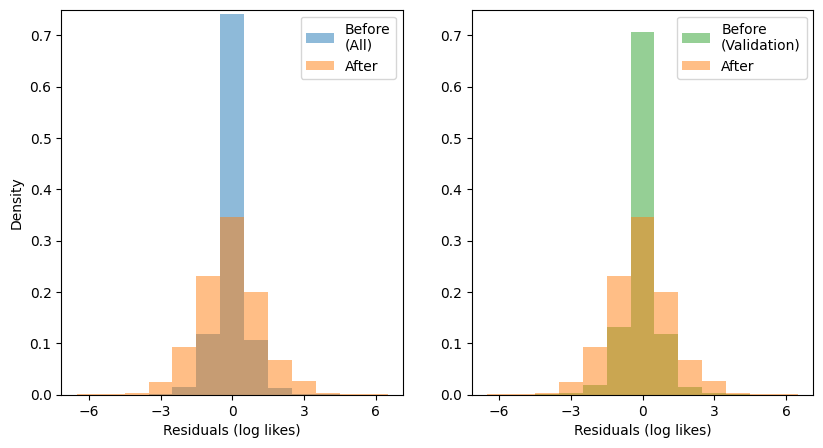

In [ ]:
# with open(predir + '/residuals_grouped_nomeaning.pkl', 'rb') as f:
#   residuals_grouped_nomeaning = pickle.load(f)

all_before = []
all_after = []
for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in residuals_grouped_nomeaning.items():
  all_before.extend(residuals_before)
  all_after.extend(residuals_after)

all_val = []
all_train = []
for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in residuals_grouped_nomeaning.items():
  all_val.extend(residuals_before_val)
  all_train.extend(residuals_before_train)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(all_before, alpha = 0.5 ,density=True, label = 'Before\n(All)', bins = np.arange(-6.5,7.5,1))
plt.hist(all_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-6.5,7.5,1))
plt.xticks(np.arange(-6,7,3))
plt.ylim([0,0.75])
# plt.hist(all_val, alpha = 0.5 ,density=True, label = 'Before\n(Validation)', bins = np.arange(-10.5,10.5,1), color = 'tab:green')
plt.xlabel('Residuals (log likes)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1,3,2)
plt.hist(all_val, alpha = 0.5 ,density=True, label = 'Before\n(Validation)', bins = np.arange(-6.5,7.5,1), color = 'tab:green')
plt.hist(all_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-6.5,7.5,1), color = 'tab:orange')
plt.xticks(np.arange(-6,7,3))
plt.ylim([0,0.75])
plt.xlabel('Residuals (log likes)')
plt.legend()

# plt.savefig(predir+'/figs/residuals_val_vs_all.png',bbox_inches='tight', dpi = 800)

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','tstat','pval','residual'])

for group, (residuals_before_train,residuals_before_val, residuals_before, residuals_after) in tqdm(residuals_grouped_nomeaning.items()):

    ttest = ttest_ind(residuals_before_val, residuals_after)
    # interval = ttest.confidence_interval()
    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])

    before_ll = data_before.query('group == @group')['log_likes']
    after_ll = data_after.query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': ['healthleft','healthleft','tradwife','tradwife'], 'residual':[True,False,True,False]})])

df_ttest['tstat'].fillna(0, inplace=True)
df_ttest['signif'].fillna(False, inplace=True)
df_ttest['signif_values'] = np.where(df_ttest['signif'], df_ttest['tstat'], 0)

df_ttest['group_order'] = df_ttest['group'].map(dict(zip(group_order,range(len(group_order)))))
df_ttest.sort_values('group_order', inplace=True)

  0%|          | 0/12 [00:00<?, ?it/s]<ipython-input-65-fa955b0fe629>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
100%|██████████| 12/12 [00:00<00:00, 35.06it/s]
<ipython-input-65-fa955b0fe629>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] =

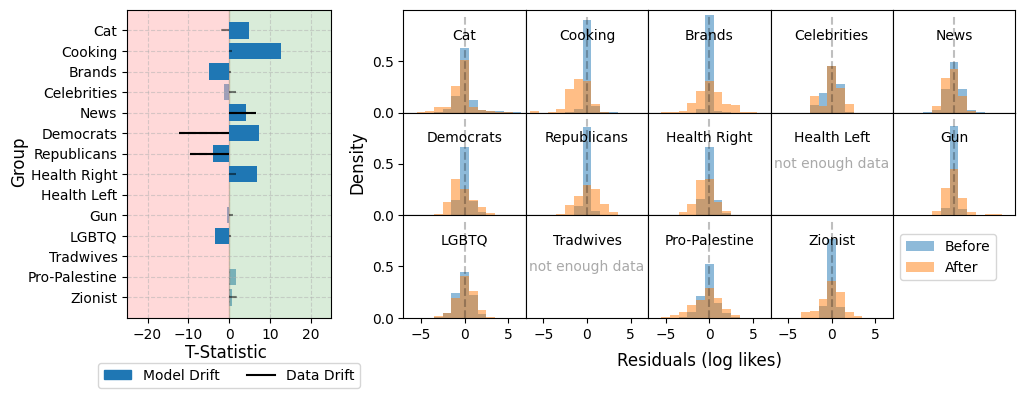

In [ ]:
fig = plt.figure(figsize=(10,4))
subfigs = fig.subfigures(1,2, width_ratios = [1,3], wspace= -0.1)

axL = subfigs[1].subplots(3,5, sharey = True, sharex = True)
plt.subplots_adjust(wspace=0, hspace=0)
for i, (ax,(group)) in enumerate(zip(axL.flat,group_order)):
  ax.set_xlim([-7, 7])
  if group in residuals_grouped_nomeaning.keys():
    residuals_before_train,residuals_before_val, residuals_before, residuals_after = residuals_grouped_nomeaning[group]
    # residuals_before = [x.cpu().numpy() for x in residuals_before]
    # residuals_after = [x.cpu().numpy() for x in residuals_after]
    ax.hist(residuals_before, alpha = 0.5 ,density=True, label = 'Before', bins = np.arange(-10.5,10.5,1))
    ax.hist(residuals_after, alpha = 0.5 ,density=True, label = 'After', bins = np.arange(-10.5,10.5,1))
    ax.vlines(0, 0, 0.95, colors='black', alpha = 0.25, linestyles="dashed")
  else:
    ax.text(0.5, 0.5, "not enough data", ha='center', va='center', transform=ax.transAxes, color = 'darkgrey')
  ax.text(0.5, 0.75, group_titles[group], ha='center', va='center', transform=ax.transAxes)
  # get ymax
  # ax.set_ylim([0,0.47])

  if i == len(group_order) - 2:
    ax.legend(loc = 'lower right', bbox_to_anchor=(2.9,0.3))
  if i % 5 != 0:
    ax.yaxis.set_visible(False)
  if i == 9:
    ax.xaxis.set_visible(False)

# delete the last ax
axL.flat[-1].remove()
subfigs[1].supxlabel('Residuals (log likes)', y=-0.02)
subfigs[1].supylabel('Density', x=0.055)

#######################################
axR = subfigs[0].subplots(1,1)
axR.barh(df_ttest.query('residual == True')['group'][::-1], df_ttest.query('residual == True')['tstat'][::-1], alpha = 0.5)
axR.barh(df_ttest.query('signif ==True and residual == True')['group'][::-1], df_ttest.query('signif ==True and residual == True')['tstat'][::-1], color = 'tab:blue', zorder = 2)

axR.hlines(range(len(group_order)), xmin=0, xmax=df_ttest.query('residual == False')['tstat'][::-1], color='black', zorder = 4, alpha = 0.5, linestyles='dashed')
axR.hlines(range(len(group_order)), xmin=0, xmax=df_ttest.query('residual == False')['signif_values'][::-1], color='black', zorder = 4)

# use fill between to color postive values green and negative values red
axR.fill_betweenx([-100,100], -100, 0, color='red', alpha=0.15, zorder = 1)
axR.fill_betweenx([-100,100], 0, 100, color='green', alpha=0.15, zorder = 1)

# set ylim xlim
axR.set_ylim([-1,len(group_order)])
axR.set_xlim([-25,25])

axR.grid(zorder=1, alpha = 0.5,  linestyle='--')
axR.set_yticks(range(len(group_titles)), [group_titles.get(g, g) for g in group_order][::-1])
axR.set_xticks([-20,-10,0,10,20])

blue_patch = mpatches.Patch(color='tab:blue', label='Residuals')
black_line = mlines.Line2D([], [], color='black', label='Log likes t-statistic')

axR.legend(handles = [blue_patch, black_line], labels = ['Model Drift', 'Data Drift'], ncols = 2, loc = "lower center", bbox_to_anchor = (0.5, -0.25))

subfigs[0].supxlabel('T-Statistic', y = 0)
subfigs[0].supylabel('Group', x = -0.32)

plt.savefig(predir+'/figs/ttest_control.png',bbox_inches='tight', dpi = 800)

# split 1

In [ ]:
date_policy1 = pd.to_datetime('2024-02-09')
earliest_before = pd.to_datetime('2023-10-01')

before_dates = pd.date_range(start=earliest_before - pd.Timedelta(days=1), end=date_policy1 - pd.Timedelta(days=14), freq='1ME') + pd.Timedelta(days=1)
len(before_dates), before_dates

(4,
 DatetimeIndex(['2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01'], dtype='datetime64[ns]', freq=None))

### get residuals

In [ ]:
models1 = dict()
residuals1 = dict()

data_after = data[data['date'] >= date_policy1]
# for group in tqdm(group_order):
for group in ['queer']:
  data_after_group = data_after[data_after['group'] == group]

  data_group = data[data['group'] == group]
  for before in before_dates:
    data_before_group = data_group[data_group['date'] < before]
    if len(data_before_group) < 100:
      print(f"Not enough data for {group} before {before}")
    else:
      # dataloaders
      train_loader, val_loader = df_to_traintest(data_before_group, TwoBranchPrepData)
      after_loader = data_loader(data_after_group, TwoBranchPrepData)

      # train
      model = TwoBranchLikesPredictor(
          sbert_dim = 384, reachback_length=REACHBACK
      ).to(device)

      model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, num_epochs= 20, verbose = False)

      torch.save(model.state_dict(), f'{predir}/models/{group}_{before}.pt')

      # get residuals
      model.eval()
      residuals_train, residuals_val, residuals_before, residuals_after = [], [], [], []
      with torch.no_grad():
          for inputs, targets in train_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_train.extend(targets - outputs.squeeze())
              residuals_before.extend(targets - outputs.squeeze())

      with torch.no_grad():
          for inputs, targets in val_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_val.extend(targets - outputs.squeeze())
              residuals_before.extend(targets - outputs.squeeze())

      with torch.no_grad():
          for inputs, targets in after_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_after.extend(targets - outputs.squeeze())

      group_residuals = (residuals_train, residuals_val, residuals_before, residuals_after)
      with open(f'{predir}/residuals/{group}_{before}.pkl', 'wb') as f:
        pickle.dump(group_residuals, f)

      # residuals1[group][before] = (residuals_train, residuals_val, residuals_before, residuals_after)


<ipython-input-6-715bcbdc89a7>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
<ipython-input-6-715bcbdc89a7>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness

In [ ]:
residuals1 = dict()
for group in tqdm(group_order):
  residuals1[group] = dict()
  for before in before_dates:
    try:
      if torch.cuda.is_available():
        with open(f'{predir}/residuals/{group}_{before}.pkl', 'rb') as f:
          residuals1[group][before] = pickle.load(f)
      else:
        with open(f'{predir}/residuals/{group}_{before}.pkl', 'rb') as f:
          residuals1[group][before] = CPU_Unpickler(f).load()
    except:
      print(f"No residuals for {group} before {before}")
      residuals1[group][before] = [[0],[0],[0],[0]]


100%|██████████| 14/14 [02:46<00:00, 11.91s/it]


In [ ]:
for group in tqdm(group_order):
  for before in before_dates:
    try:
      residuals_train, residuals_val, residuals_before, residuals_after = residuals1[group][before]
      # move to cpu, change to numpy array
      residuals_train = [float(x.cpu()) for x in residuals_train]
      residuals_val = [float(x.cpu()) for x in residuals_val]
      residuals_before = [float(x.cpu()) for x in residuals_before]
      residuals_after = [float(x.cpu()) for x in residuals_after]
      residuals1[group][before] = (residuals_train, residuals_val, residuals_before, residuals_after)
    except:
      print(f"No residuals for {group} before {before}")
      residuals1[group][before] = [[0],[0],[0],[0]]


100%|██████████| 14/14 [00:06<00:00,  2.30it/s]


In [ ]:
with open(f'{predir}/residuals/residuals1.pkl', 'wb') as f:
  pickle.dump(residuals1, f)

### analysis

In [ ]:
with open(f'{predir}/residuals/residuals1.pkl', 'rb') as f:
    residuals1 = pickle.load(f)

In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','before','tstat','pval','residual'])

for group in group_order:
  for before in before_dates:
    try:
      residuals_train, residuals_val, residuals_before, residuals_after = residuals1[group][before]

      ttest = ttest_ind(residuals_val, residuals_after)
      # interval = ttest.confidence_interval()
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
    except:
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [np.nan], 'pval': [np.nan], 'residual':True})])
    before_ll = data[data['date'] < before].query('group == @group')['log_likes']
    after_ll = data[data['date'] >= date_policy1].query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

<ipython-input-15-385dd35b62d7>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])


Text(0, 0.5, 'T-Statistic')

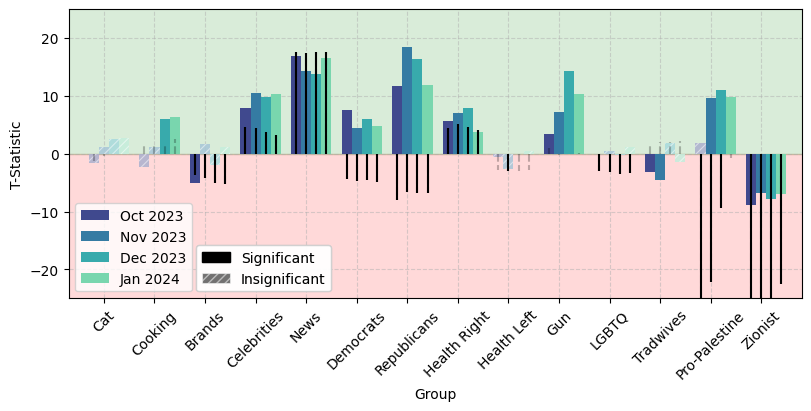

In [ ]:
# make a grouped barchart with different colors for different 'before'
x = np.arange(len(group_order))
width = 0.2
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("mako", len(before_dates)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (8,4))
for color, before in zip(colors, before_dates):
  offset = width * multiplier
  df_before = df_ttest[df_ttest['before'] == before]
  df_residual = df_before[df_before['residual'] == True].copy()
  df_ll = df_before[df_before['residual'] == False].copy()

  # change to vlines
  ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

  # get tstat if significant, otherwise 0
  df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
  # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
  ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


  rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
  rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
  rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %Y"))
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in group_order], rotation = 45)

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,len(group_order)])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 3)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=3,bbox_to_anchor=(0.165,0))
ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0)

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_split1.png',bbox_inches='tight', dpi = 800)

Text(0, 0.5, 'T-Statistic')

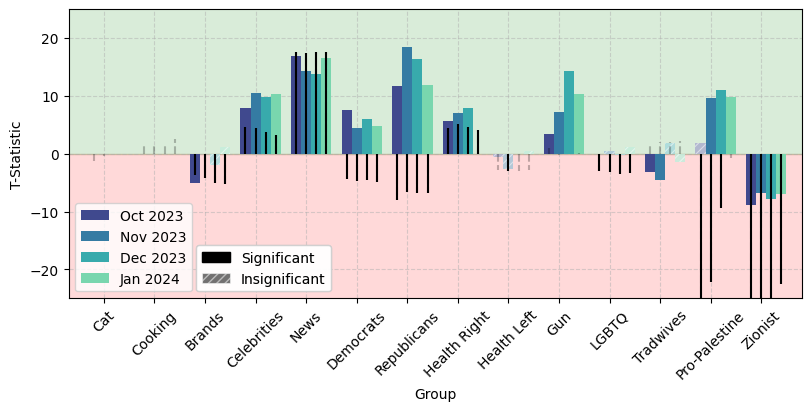

In [ ]:
# make a grouped barchart with different colors for different 'before'
x = np.arange(len(group_order))
width = 0.2
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("mako", len(before_dates)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (8,4))
for color, before in zip(colors, before_dates):
  offset = width * multiplier
  df_before = df_ttest[df_ttest['before'] == before]
  df_residual = df_before[df_before['residual'] == True].copy()
  df_ll = df_before[df_before['residual'] == False].copy()

  # change to vlines
  ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

  # get tstat if significant, otherwise 0
  df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
  # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
  ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


  rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
  rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
  rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %Y"))
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in group_order], rotation = 45)

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,len(group_order)])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 3)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=3,bbox_to_anchor=(0.165,0))
ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0)

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_split1.png',bbox_inches='tight', dpi = 800)

### Week by week israel / palestine

In [ ]:
date_policy1 = pd.to_datetime('2024-02-09')
earliest_before = pd.to_datetime('2023-10-1')

before_dates1a = pd.date_range(start=earliest_before - pd.Timedelta(days=1), end=date_policy1 - pd.Timedelta(days=14), freq='7D')[:4] + pd.Timedelta(days=1)
len(before_dates1a), before_dates1a

(4,
 DatetimeIndex(['2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22'], dtype='datetime64[ns]', freq='7D'))

#### getting residuals

In [ ]:
data_after = data[data['date'] >= date_policy1]
for group in tqdm(['zionist','palestine']):
  data_after_group = data_after[data_after['group'] == group]

  data_group = data[data['group'] == group]
  for before in before_dates1a[:2]:
    data_before_group = data_group[data_group['date'] < before]
    if len(data_before_group) < 100:
      print(f"Not enough data for {group} before {before}")
    else:
      # dataloaders
      train_loader, val_loader = df_to_traintest(data_before_group, TwoBranchPrepData)
      after_loader = data_loader(data_after_group, TwoBranchPrepData)

      # train
      model = TwoBranchLikesPredictor(
          sbert_dim = 384, reachback_length=REACHBACK
      ).to(device)

      model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, num_epochs= 20, verbose = False)

      torch.save(model.state_dict(), f'{predir}/models/{group}_{before}_a.pt')

      # get residuals
      model.eval()
      residuals_train, residuals_val, residuals_before, residuals_after = [], [], [], []
      with torch.no_grad():
          for inputs, targets in train_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_train.extend(targets - outputs.squeeze())
              residuals_before.extend(targets - outputs.squeeze())

      with torch.no_grad():
          for inputs, targets in val_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_val.extend(targets - outputs.squeeze())
              residuals_before.extend(targets - outputs.squeeze())

      with torch.no_grad():
          for inputs, targets in after_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_after.extend(targets - outputs.squeeze())

      group_residuals = (residuals_train, residuals_val, residuals_before, residuals_after)
      with open(f'{predir}/residuals/{group}_{before}_a.pkl', 'wb') as f:
        pickle.dump(group_residuals, f)

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-22-715bcbdc89a7>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
<ipython-input-22-715bcbdc89a7>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32))
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the wo

In [ ]:
residuals1a = dict()
for group in tqdm(['palestine','zionist']):
  residuals1a[group] = dict()
  for before in before_dates1a:
    try:
      with open(f'{predir}/residuals/{group}_{before}_a.pkl', 'rb') as f:
        residuals1a[group][before] = pickle.load(f)
    except:
      print(f"No residuals for {group} before {before}")
      residuals1a[group][before] = [[0],[0],[0],[0]]

100%|██████████| 2/2 [00:21<00:00, 10.97s/it]


In [ ]:
for group in tqdm(['palestine','zionist']):
  for before in before_dates1a:
    try:
      residuals_train, residuals_val, residuals_before, residuals_after = residuals1a[group][before]
      # move to cpu, change to numpy array
      residuals_train = [float(x.cpu()) for x in residuals_train]
      residuals_val = [float(x.cpu()) for x in residuals_val]
      residuals_before = [float(x.cpu()) for x in residuals_before]
      residuals_after = [float(x.cpu()) for x in residuals_after]
      residuals1a[group][before] = (residuals_train, residuals_val, residuals_before, residuals_after)
    except:
      print(f"No residuals for {group} before {before}")
      residuals1a[group][before] = [[0],[0],[0],[0]]


100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


In [ ]:
with open(f'{predir}/residuals/residuals1a.pkl', 'wb') as f:
  pickle.dump(residuals1a, f)

#### analysis

In [ ]:
with open(f'{predir}/residuals/residuals1a.pkl', 'rb') as f:
    residuals1a = pickle.load(f)

In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','before','tstat','pval','residual'])

for group in ['palestine','zionist']:
  for before in before_dates1a:
    try:
      residuals_train, residuals_val, residuals_before, residuals_after = residuals1a[group][before]

      ttest = ttest_ind(residuals_val, residuals_after)
      # interval = ttest.confidence_interval()
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
    except:
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [np.nan], 'pval': [np.nan], 'residual':True})])
    before_ll = data[data['date'] < before].query('group == @group')['log_likes']
    after_ll = data[data['date'] >= date_policy1].query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

<ipython-input-113-880b0a4b29f3>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])


Text(0, 0.5, 'T-Statistic')

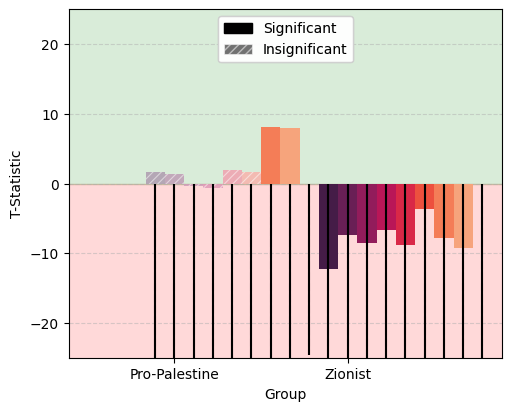

In [ ]:
# make a grouped barchart with different colors for different 'before'
x = np.arange(2)
width = 1 / 9
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("rocket", len(before_dates1a)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (5,4))
for color, before in zip(colors, before_dates1a):
  try:
    offset = width * multiplier
    df_before = df_ttest[df_ttest['before'] == before]
    df_residual = df_before[df_before['residual'] == True].copy()
    df_ll = df_before[df_before['residual'] == False].copy()

    # change to vlines
    ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

    # get tstat if significant, otherwise 0
    df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
    # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
    ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


    rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
    rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
    # get tstat if significant, otherwise 0
    df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
    rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %d %Y"))
    # ax.bar_label(rects, padding=3)
    multiplier += 1
  except:
    pass

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in ['palestine','zionist']])

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,2])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 2)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=2,bbox_to_anchor=(0.33,1))
# ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0, axis='y')

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_split1a.png',bbox_inches='tight', dpi = 800)

# split 2

In [ ]:
date_policy2 = pd.to_datetime('2025-01-07')
earliest_before = pd.to_datetime('2024-09-01')

before_dates = pd.date_range(start=earliest_before - pd.Timedelta(days=1), end=date_policy2 - pd.Timedelta(days=14), freq='1ME') + pd.Timedelta(days=1)
len(before_dates), before_dates

(4,
 DatetimeIndex(['2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'], dtype='datetime64[ns]', freq=None))

In [ ]:
models2 = dict()
residuals2 = dict()

data_after = data[data['date'] >= date_policy2]
# for group in tqdm(group_order):
for group in ['queer']:
  data_after_group = data_after[data_after['group'] == group]

  data_group = data[data['group'] == group]
  for before in before_dates:
    data_before_group = data_group[data_group['date'] > date_policy1]
    data_before_group = data_group[data_group['date'] < before]
    if len(data_before_group) < 100:
      print(f"Not enough data for {group} before {before}")
    else:
      # dataloaders
      train_loader, val_loader = df_to_traintest(data_before_group, TwoBranchPrepData)
      after_loader = data_loader(data_after_group, TwoBranchPrepData)

      # train
      model = TwoBranchLikesPredictor(
          sbert_dim = 384, reachback_length=REACHBACK
      ).to(device)

      model, train_loss_history, val_loss_history = train_model(model, train_loader, val_loader, lr=0.001, num_epochs= 20, verbose = False)

      torch.save(model.state_dict(), f'{predir}/models2/{group}_{before}.pt')

      # get residuals
      model.eval()
      residuals_train, residuals_val, residuals_before, residuals_after = [], [], [], []
      with torch.no_grad():
          for inputs, targets in train_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_train.extend(targets - outputs.squeeze())
              residuals_before.extend(targets - outputs.squeeze())

      with torch.no_grad():
          for inputs, targets in val_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_val.extend(targets - outputs.squeeze())
              residuals_before.extend(targets - outputs.squeeze())

      with torch.no_grad():
          for inputs, targets in after_loader:
              inputs, targets = inputs.to(device), targets.to(device)
              outputs = model(inputs)
              residuals_after.extend(targets - outputs.squeeze())

      group_residuals = (residuals_train, residuals_val, residuals_before, residuals_after)
      with open(f'{predir}/residuals2/{group}_{before}.pkl', 'wb') as f:
        pickle.dump(group_residuals, f)


### analysis

In [ ]:
residuals2 = dict()
for group in tqdm(group_order):
  residuals2[group] = dict()
  for before in before_dates:
    try:
      if torch.cuda.is_available():
        with open(f'{predir}/residuals2/{group}_{before}.pkl', 'rb') as f:
          residuals2[group][before] = pickle.load(f)
      else:
        with open(f'{predir}/residuals2/{group}_{before}.pkl', 'rb') as f:
          residuals2[group][before] = CPU_Unpickler(f).load()
    except:
      print(f"No residuals for {group} before {before}")
      residuals2[group][before] = [[0],[0],[0],[0]]

100%|██████████| 14/14 [04:37<00:00, 19.81s/it]


In [ ]:
for group in tqdm(group_order):
  for before in before_dates:
    try:
      residuals_train, residuals_val, residuals_before, residuals_after = residuals2[group][before]
      # move to cpu, change to numpy array
      # residuals_train = [float(x.cpu()) for x in residuals_train]
      # residuals_val = [float(x.cpu()) for x in residuals_val]
      # residuals_before = [float(x.cpu()) for x in residuals_before]
      # residuals_after = [float(x.cpu()) for x in residuals_after]
      residuals_train = [float(x) for x in residuals_train]
      residuals_val = [float(x) for x in residuals_val]
      residuals_before = [float(x) for x in residuals_before]
      residuals_after = [float(x) for x in residuals_after]
      residuals2[group][before] = (residuals_train, residuals_val, residuals_before, residuals_after)
    except:
      print(f"No residuals for {group} before {before}")
      residuals2[group][before] = [[0],[0],[0],[0]]

100%|██████████| 14/14 [00:04<00:00,  3.02it/s]


In [ ]:
with open(f'{predir}/residuals/residuals2.pkl', 'wb') as f:
  pickle.dump(residuals2, f)

In [ ]:
# with open(f'{predir}/residuals/residuals1.pkl', 'rb') as f:
#     residuals1 = pickle.load(f)

In [ ]:
# t-test on averages before and after
from scipy.stats import ttest_ind
from scipy.stats import permutation_test
from datetime import timedelta

df_ttest = pd.DataFrame(columns=['group','before','tstat','pval','residual'])

for group in group_order:
  for before in before_dates:
    try:
      residuals_train, residuals_val, residuals_before, residuals_after = residuals2[group][before]

      ttest = ttest_ind(residuals_val, residuals_after)
      # interval = ttest.confidence_interval()
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])
    except:
      df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [np.nan], 'pval': [np.nan], 'residual':True})])
    before_ll = data[data['date'] < before].query('group == @group')['log_likes']
    after_ll = data[data['date'] >= date_policy2].query('group == @group')['log_likes']

    ttest = ttest_ind(before_ll, after_ll)

    df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':False})])

df_ttest['signif'] = (df_ttest['pval'] * 14) < 0.05 # bonferroni correction

<ipython-input-32-fde1bfdedcfc>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_ttest = pd.concat([df_ttest, pd.DataFrame({'group': [group], 'before': [before], 'tstat': [ttest[0]], 'pval': [ttest[1]], 'residual':True})])


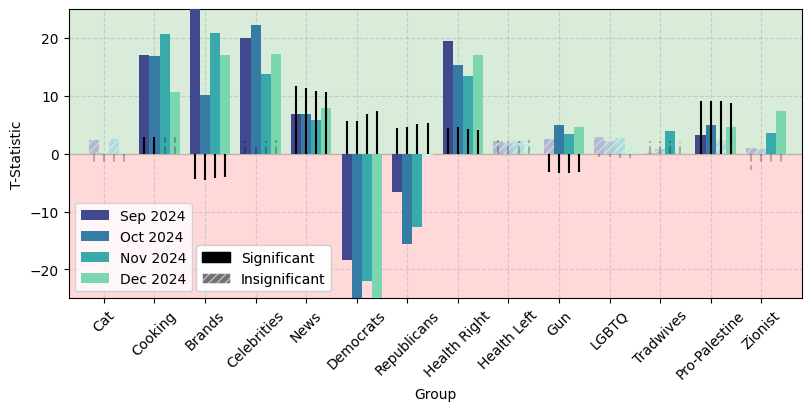

In [ ]:
# make a grouped barchart with different colors for different 'before'
x = np.arange(len(group_order))
width = 0.2
multiplier = 0

# make colormap from seaborn rocket
colors = sns.color_palette("mako", len(before_dates)+1)[1:]

fig, ax = plt.subplots(layout='constrained', figsize = (8,4))
for color, before in zip(colors, before_dates):
  offset = width * multiplier
  df_before = df_ttest[df_ttest['before'] == before]
  df_residual = df_before[df_before['residual'] == True].copy()
  df_ll = df_before[df_before['residual'] == False].copy()

  # change to vlines
  ax.vlines(x + offset, ymin=0, ymax=df_ll['tstat'], color='black', alpha = 0.25, zorder = 4, linestyles='dashed')

  # get tstat if significant, otherwise 0
  df_ll['signif_values'] = np.where(df_ll['signif'], df_ll['tstat'], 0)
  # rects = ax.bar(x + offset, df_ll['signif_values'], 0.05, color='black', zorder = 4)
  ax.vlines(x + offset, ymin=0, ymax=df_ll['signif_values'], color='black', zorder = 4)


  rects = ax.bar(x + offset, df_residual['tstat'], width, color=color, alpha = 0.75, zorder = 3)
  rects = ax.bar(x + offset, df_residual['tstat'], width, edgecolor='white', color = 'white', hatch = '////', alpha = 0.5, hatch_linewidth = 0.8, zorder = 3, linewidth = 0)
  # get tstat if significant, otherwise 0
  df_residual['signif_values'] = np.where(df_residual['signif'], df_residual['tstat'], 0)
  rects = ax.bar(x + offset, df_residual['signif_values'], width, color=color, zorder = 3, label=before.strftime("%b %Y"))
  # ax.bar_label(rects, padding=3)
  multiplier += 1

ax.fill_betweenx([-100,0], -100, 100, color='red', alpha=0.15, zorder = 1)
ax.fill_betweenx([0,100], -100, 100, color='green', alpha=0.15, zorder = 1)

ax.set_ylabel('t-statistic')
ax.set_xticks(x + width, [group_titles[x] for x in group_order], rotation = 45)

# set ylim
ax.set_ylim(-25,25)
ax.set_xlim([-0.5,len(group_order)])

# add black square labeled "significant" and black with alpha = 0 and white hatches as "insignificant"
black_patch = mpatches.Patch(color='black', label = 'Significant')
white_patch = mpatches.Patch(color='black', label = 'Insignificant', alpha = 0.5)
white_patch.update({'hatch': '////', 'edgecolor': 'white', 'linewidth': 0.8})

# make separate legend for significant insignificant
handles, labels = ax.get_legend_handles_labels()
l1 = ax.legend(handles, labels, loc = 3)
l2 = ax.legend(handles=[black_patch, white_patch], labels=['Significant', 'Insignificant'], loc=3,bbox_to_anchor=(0.165,0))
ax.add_artist(l1)
ax.add_artist(l2)


# add grid
ax.grid(alpha=0.5, linestyle='--', zorder = 0)

ax.set_xlabel('Group')
ax.set_ylabel('T-Statistic')

# plt.savefig(predir+'/figs/ttest_split2.png',bbox_inches='tight', dpi = 800)